In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datams/ms-new.png
/kaggle/input/datams/MS.png
/kaggle/input/datams/ms_new.png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (2).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (94).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (380).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (652).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (239).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (511).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (181).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (69).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (248).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (750).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (439).png
/kaggle/input/multiple-sclerosis/Multiple S

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import glob
import os
from PIL import Image



import numpy as np 
import glob
from sklearn.metrics import confusion_matrix , accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

D0704 08:33:08.405656158      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0704 08:33:08.405683828      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0704 08:33:08.405688499      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0704 08:33:08.405692036      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0704 08:33:08.405695085      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0704 08:33:08.405705836      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0704 08:33:08.405709262      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0704 08:33:08.

In [3]:
import os
import random
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [4]:
data_folders = {
    "Control-Axial": "/kaggle/input/multiple-sclerosis/Multiple Sclerosis/Control-Axial",
    "Control-Sagittal": "/kaggle/input/multiple-sclerosis/Multiple Sclerosis/Control-Sagittal",
    "MS-Axial": "/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Axial",
    "MS-Sagittal": "/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal"
}

# Set the desired number of augmented images per folder
desired_images = 3000

# Set the output directory for augmented images
output_dir = "/kaggle/working/Augmented"

In [5]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
import numpy as np

# Perform data augmentation for each folder
for folder_name, folder_path in data_folders.items():
    file_list = os.listdir(folder_path)
    current_images = len(file_list)
    
    if current_images >= desired_images:
        print(f"Skipping {folder_name}. It already contains {current_images} images.")
        continue
    
    print(f"Augmenting {folder_name}...")
    
    # Create the output directory if it doesn't exist
    output_folder = os.path.join(output_dir, folder_name)
    os.makedirs(output_folder, exist_ok=True)
    
    # Perform data augmentation until desired_images is reached
    while current_images < desired_images:
        # Select a random image from the original folder
        image_file = random.choice(file_list)
        image_path = os.path.join(folder_path, image_file)
        
        # Load the image and convert it to an array
        image = Image.open(image_path)
        
        # Convert RGBA image to RGB if it has an alpha channel
        if image.mode == "RGBA":
            image = image.convert("RGB")
        
        image_array = np.array(image)
        image_array = image_array.reshape((1,) + image_array.shape)
        
        # Generate augmented images and save them
        for batch in datagen.flow(image_array, batch_size=1, save_to_dir=output_folder, save_prefix='aug', save_format='jpeg'):
            current_images += 1
            if current_images >= desired_images:
                break
    
    print(f"Augmentation completed for {folder_name}.")

Augmenting Control-Axial...
Augmentation completed for Control-Axial.
Augmenting Control-Sagittal...
Augmentation completed for Control-Sagittal.
Augmenting MS-Axial...
Augmentation completed for MS-Axial.
Augmenting MS-Sagittal...
Augmentation completed for MS-Sagittal.


In [7]:
# Count the number of images in each output folder
for folder_name in data_folders.keys():
    output_folder = os.path.join(output_dir, folder_name)
    output_files = os.listdir(output_folder)
    num_augmented_images = len(output_files)
    print(f"Number of augmented images in {folder_name}: {num_augmented_images}")


Number of augmented images in Control-Axial: 1813
Number of augmented images in Control-Sagittal: 1769
Number of augmented images in MS-Axial: 2107
Number of augmented images in MS-Sagittal: 2003


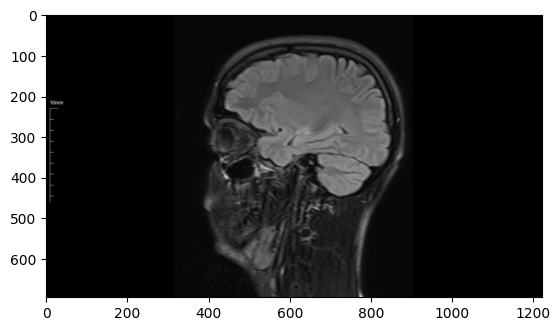

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
 
# Specify the image file path
img_path = '/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (239).png'

# Load the image
image = Image.open(img_path)

# Display the image
plt.imshow(image)
plt.show()


**MS AXIAL**

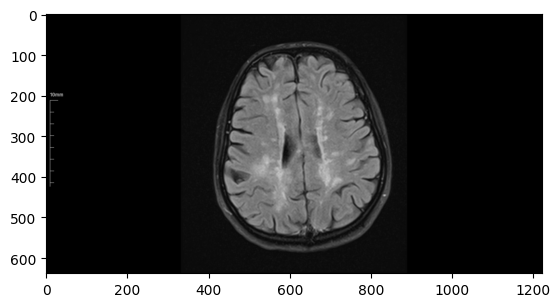

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the image file path
img_path = '/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Axial/MS-A (101).png'

# Load the image
image = Image.open(img_path)

# Display the image
plt.imshow(image)
plt.show()



**Control-Sagittal**

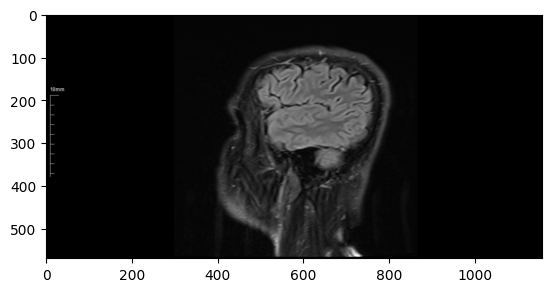

In [10]:

from PIL import Image
import matplotlib.pyplot as plt

# Specify the image file path
img_path = '/kaggle/input/multiple-sclerosis/Multiple Sclerosis/Control-Sagittal/C-S (399).png'

# Load the image
image = Image.open(img_path)

# Display the image
plt.imshow(image)
plt.show()



**Control-Axial**

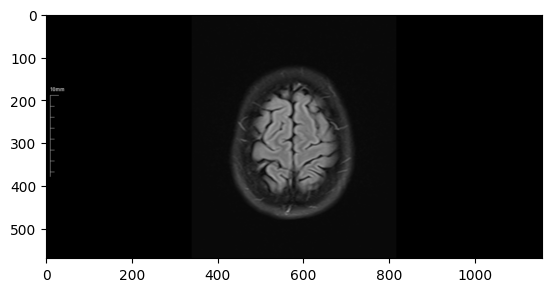

In [11]:

from PIL import Image
import matplotlib.pyplot as plt

# Specify the image file path
img_path = '/kaggle/input/multiple-sclerosis/Multiple Sclerosis/Control-Axial/C-A (349).png'

# Load the image
image = Image.open(img_path)

# Display the image
plt.imshow(image)
plt.show()



In [12]:
import os

# Set the paths to your augmented data folders
augmented_folders = {
    "Control-Axial": "/kaggle/working/Augmented/Control-Axial",
    "Control-Sagittal": "/kaggle/working/Augmented/Control-Sagittal",
    "MS-Axial": "/kaggle/working/Augmented/MS-Axial",
    "MS-Sagittal": "/kaggle/working/Augmented/MS-Sagittal"
}

# Count the total number of augmented images
total_images = 0
for folder_path in augmented_folders.values():
    files = os.listdir(folder_path)
    total_images += len(files)

print(f"Total number of augmented images: {total_images}")


Total number of augmented images: 7692


In [13]:
dataset = []    
label = []  

In [14]:
path = '/kaggle/working/Augmented/Control-Axial/*'
for f in glob.iglob(path):
    img1=cv2.imread(f)
    img1 = Image.fromarray(img1, 'RGB')
    img1 = img1.resize((224, 224))
    dataset.append(np.array(img1))
    label.append(0)

In [15]:
path = '/kaggle/working/Augmented/MS-Axial/*'
for f in glob.iglob(path):
    img2=cv2.imread(f)
    img2 = Image.fromarray(img2, 'RGB')
    img2 = img2.resize((224, 224))
    dataset.append(np.array(img2))
    label.append(1)

In [16]:
path = '/kaggle/working/Augmented/Control-Sagittal/*'
for f in glob.iglob(path):
    img3=cv2.imread(f)
    img3 = Image.fromarray(img3, 'RGB')
    img3 = img3.resize((224, 224))
    dataset.append(np.array(img3))
    label.append(2)

In [17]:
path = '/kaggle/working/Augmented/MS-Sagittal/*'
for f in glob.iglob(path):
    img4=cv2.imread(f)
    img4 = Image.fromarray(img4, 'RGB')
    img4 = img4.resize((224, 224))
    dataset.append(np.array(img4))
    label.append(3)

In [18]:
len(dataset)

7692

In [19]:
len(label)

7692

**Control Axial**

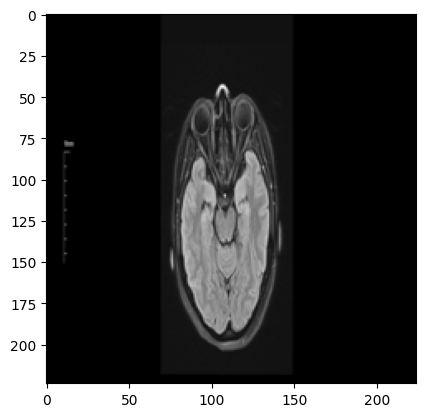

In [20]:
n=500  #Select the index of image to be loaded for testing
img = dataset[n]
plt.imshow(img)

**Control Sagittal**

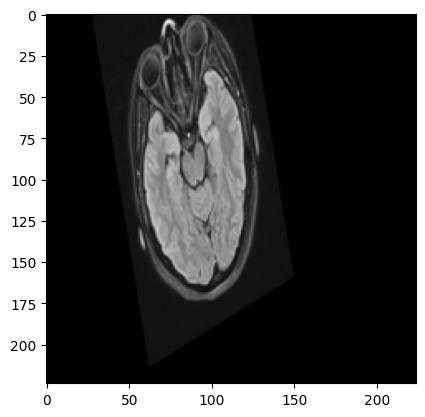

In [21]:
n=1500
#Select the index of image to be loaded for testing
img = dataset[n]
plt.imshow(img)

**MS-Axial**

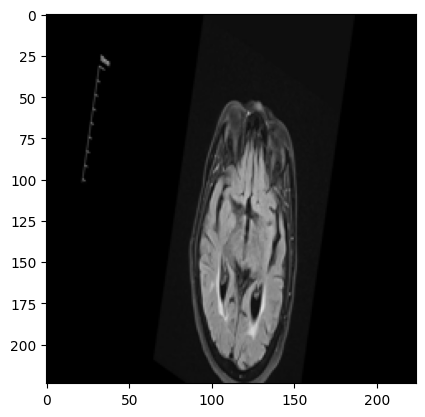

In [22]:
n=3500
#Select the index of image to be loaded for testing
img = dataset[n]
plt.imshow(img)

**MS-Sagittal**

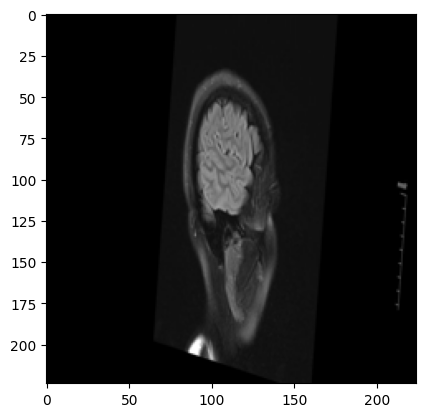

In [23]:
n=4000
#Select the index of image to be loaded for testing
img = dataset[n]
plt.imshow(img)

In [24]:
dataset = np.array(dataset)
label = np.array(label)

In [25]:
#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [26]:
X_train = X_train /255.
X_test = X_test /255.

In [27]:
#Since we will be using categorical cross entropy loss, we need to convert our Y values to categorical. 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 57.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


EXCEPTION MODEL

In [29]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import cv2
import timeit
import numpy as np 
import pandas as pd
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from keras import Model
import matplotlib.pyplot as plt
from keras.metrics import MeanIoU
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.layers import MaxPooling2D,BatchNormalization,Conv2D,Dense,Activation,Conv2DTranspose,Input
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D,Concatenate
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import Image, display
# preprocessing and processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# ploting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
# split data
from sklearn.model_selection import train_test_split
# CNN
from keras import models, layers
# val
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Define the exception model architecture
exception_model = Sequential()
exception_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
exception_model.add(BatchNormalization())
exception_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
exception_model.add(MaxPooling2D(pool_size=(2, 2)))
exception_model.add(Dropout(0.25))
exception_model.add(Flatten())
exception_model.add(Dense(128, activation='relu'))
exception_model.add(BatchNormalization())
exception_model.add(Dropout(0.5))
exception_model.add(Dense(4, activation='softmax'))

exception_model.summary()

# Compile the model
exception_model.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adamax(lr=0.001),
                        metrics=['accuracy'])

# Set up checkpoints
checkp = ModelCheckpoint('./exception_model.h5', monitor='accuracy', save_best_only=True, verbose=1)

# Train the model
history_e = exception_model.fit(X_train, y_train, batch_size=32, epochs=10, 
                              validation_data=(X_test, y_test), workers=10, callbacks=[checkp])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten (Flatten)           (None, 774400)            0

Epoch 1/10
193/193 [==============================] - ETA: 0s - loss: 0.4177 - accuracy: 0.8458
Epoch 1: accuracy improved from -inf to 0.84577, saving model to ./exception_model.h5
193/193 [==============================] - 410s 2s/step - loss: 0.4177 - accuracy: 0.8458 - val_loss: 6.8429 - val_accuracy: 0.2385
Epoch 2/10
193/193 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9932
Epoch 2: accuracy improved from 0.84577 to 0.99317, saving model to ./exception_model.h5
193/193 [==============================] - 408s 2s/step - loss: 0.0387 - accuracy: 0.9932 - val_loss: 6.8530 - val_accuracy: 0.2385
Epoch 3/10
193/193 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9982
Epoch 3: accuracy improved from 0.99317 to 0.99821, saving model to ./exception_model.h5
193/193 [==============================] - 408s 2s/step - loss: 0.0217 - accuracy: 0.9982 - val_loss: 2.4537 - val_accuracy: 0.6192
Epoch 4/10
193/193 [==============================] 

In [30]:
# Make predictions on test data
y_pred = exception_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to categorical
y_test_classes = np.argmax(y_test, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes)

# Print the report
print(report)

49/49 [==============================] - 12s 232ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       418
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       401

    accuracy                           1.00      1539
   macro avg       1.00      1.00      1.00      1539
weighted avg       1.00      1.00      1.00      1539



49/49 [==============================] - 11s 230ms/step


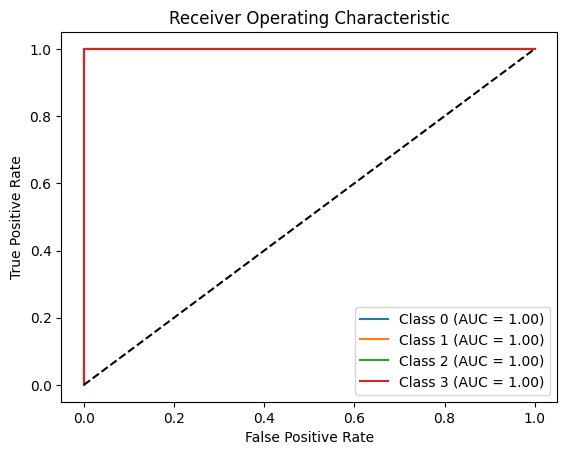

In [31]:
# Make predictions on test data
y_pred_prob = exception_model.predict(X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test_classes))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_prob[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

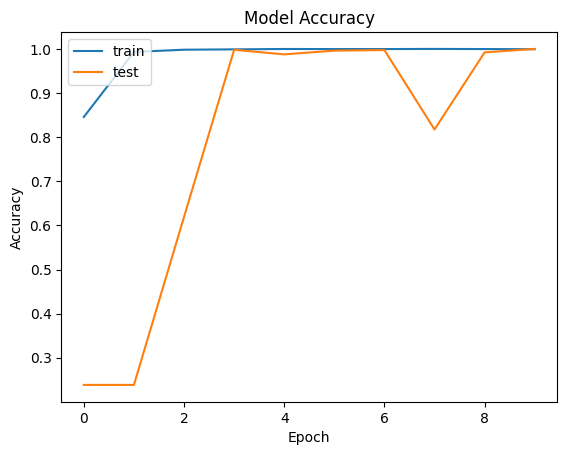

In [32]:
k = ''
if 'accuracy' in history_e.history :
    k = 'accuracy'    

if 'acc' in history_e.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_e.history[k])
    plt.plot(history_e.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

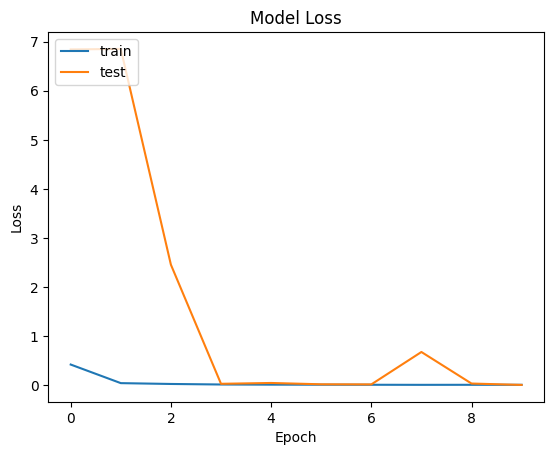

In [34]:
k = ''
if 'loss' in history_e.history:
    k = 'loss'

if 'mse' in history_e.history:
    k = 'mse'

if k != '':
    plt.plot(history_e.history[k])
    plt.plot(history_e.history['val_' + k])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

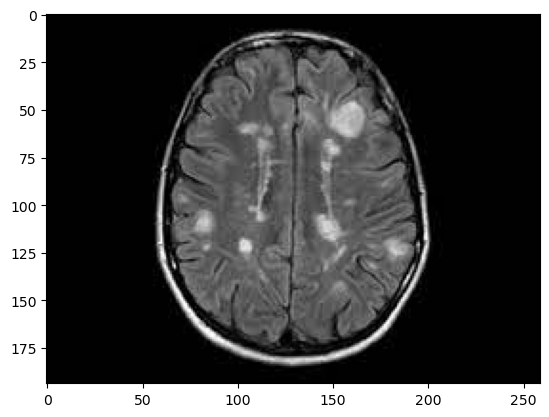

1/1 [==============================] - 0s 243ms/step
The prediction for this image is: 2


In [35]:
import cv2
import numpy as np

img_path = '/kaggle/input/datams/ms_new.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB color space
resized_img = cv2.resize(img, (224, 224))  # Resize the image to (224, 224)

plt.imshow(img)
plt.show()

input_img = np.expand_dims(resized_img, axis=0)  # Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(full_model.predict(input_img))
print("The prediction for this image is:", prediction)

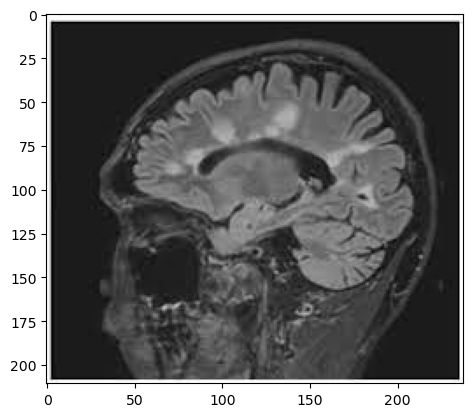

1/1 [==============================] - 0s 23ms/step
The prediction for this image is: 3


In [36]:
import cv2
import numpy as np

img_path = '/kaggle/input/datams/ms-new.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB color space
resized_img = cv2.resize(img, (224, 224))  # Resize the image to (224, 224)

plt.imshow(img)
plt.show()

input_img = np.expand_dims(resized_img, axis=0)  # Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(full_model.predict(input_img))
print("The prediction for this image is:", prediction)

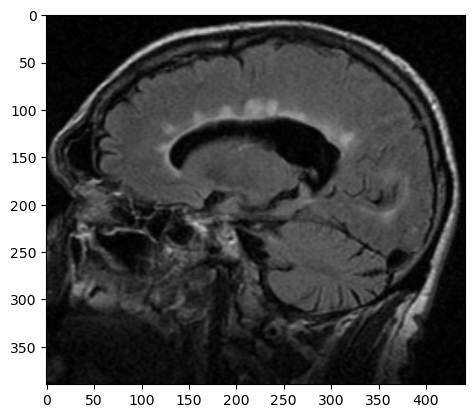

1/1 [==============================] - 0s 19ms/step
The prediction for this image is: 3


In [37]:
import cv2
import numpy as np

img_path = '/kaggle/input/datams/MS.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB color space
resized_img = cv2.resize(img, (224, 224))  # Resize the image to (224, 224)

plt.imshow(img)
plt.show()

input_img = np.expand_dims(resized_img, axis=0)  # Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(full_model.predict(input_img))
print("The prediction for this image is:", prediction)